In [1]:
import os

import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

/Users/grieser/Projects/alphagrad/src/alphagrad/eval/RobotArm_6DOF/A0_data
A0_RobotArm_250197.csv (1950,)
A0_RobotArm_541.csv (1950,)
A0_RobotArm_1743.csv (1950,)
A0_RobotArm_1337.csv (1950,)
A0_Robot_Arm_123.csv (1950,)
A0_RobotArm_42.csv (1950,)


/tmp/ipykernel_2882002/4139683831.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


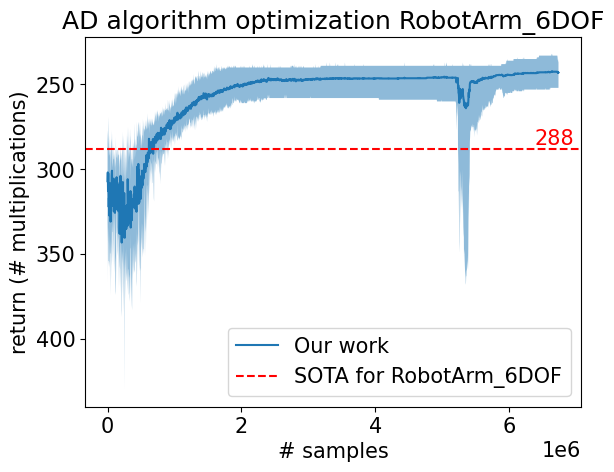

In [5]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc('font', **font)

runs = []
print(os.path.join(os.getcwd(), "A0_data"))
for file in os.listdir(path=os.path.join(os.getcwd(), "A0_data")):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), "A0_data/", file), delimiter=",", skip_header=1)
								num_samples = data[:1950, 0]*32*108
								num_muls = data[:1950, 1]
								print(file, num_muls.shape)
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)
data_err = jnp.stack([data_min, data_max], axis=0)


fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-288., color="r", linestyle="--", label="SOTA for RobotArm_6DOF")
ax.annotate("288", (num_samples[-1], -288), textcoords="offset points", xytext=(-3, 3), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")
ax.set_title("AD algorithm optimization RobotArm_6DOF")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

In [2]:
from graphax.perf import plot_performance
from graphax.examples import RobotArm_6DOF

In [3]:
# 231 mults
order = [37, 18, 22, 41, 40, 8, 9, 101, 64, 36, 32, 61, 21, 14, 63, 2, 23, 82, 
        67, 7, 94, 15, 52, 49, 20, 97, 74, 93, 34, 77, 6, 31, 30, 104, 51, 103, 
        33, 105, 65, 76, 48, 45, 90, 44, 99, 95, 47, 46, 55, 73, 84, 29, 19, 79, 
        26, 57, 42, 43, 16, 92, 113, 112, 110, 53, 89, 35, 88, 107, 72, 70, 50, 
        71, 39, 83, 78, 111, 60, 58, 81, 38, 28, 5, 87, 108, 3, 91, 86, 109, 27, 
        54, 69, 25, 17, 106, 56, 10, 11, 75, 100, 1, 59, 98, 80, 4, 96, 13, 24, 12]

mM_order = [6, 7, 9, 10, 14, 18, 19, 21, 22, 53, 63, 64, 65, 67, 77, 78, 
            79, 80, 82, 94, 95, 96, 97, 99, 103, 104, 105, 107, 113, 2, 
            5, 8, 11, 17, 20, 23, 25, 27, 29, 30, 33, 35, 37, 38, 41, 43, 
            45, 46, 49, 50, 54, 55, 58, 59, 69, 71, 73, 74, 81, 84, 86, 
            88, 90, 91, 98, 101, 106, 109, 111, 26, 31, 34, 39, 42, 47, 
            51, 56, 60, 70, 75, 83, 87, 92, 100, 108, 110, 52, 61, 15, 
            28, 36, 44, 48, 57, 72, 1, 89, 13, 112, 3, 32, 40, 4, 16, 76, 
            93, 12, 24]

In [4]:

shape = (512,)
key = jrand.PRNGKey(42)
xs = [.01, .02, .02, .01, .03, .03]
xs = [jrand.uniform(key, shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
RobotArm_6DOF(*xs)

(Array([1158.8237, 1135.8896, 1151.4503, 1143.5951, 1152.6807, 1162.8438,
        1118.0844, 1166.6547, 1144.1571, 1167.1547, 1133.0068, 1158.4983,
        1119.6162, 1119.5928, 1147.917 , 1127.5211, 1125.9072, 1163.9418,
        1143.2054, 1136.8043, 1158.7008, 1168.6715, 1141.0913, 1121.7856,
        1136.4293, 1140.373 , 1137.5614, 1118.29  , 1165.75  , 1164.8977,
        1152.4126, 1140.0035, 1164.853 , 1140.5325, 1148.693 , 1152.7914,
        1136.9708, 1125.1423, 1136.0242, 1131.1779, 1157.2389, 1143.3026,
        1133.8749, 1132.7173, 1115.3447, 1160.4966, 1157.7417, 1159.6979,
        1158.0819, 1159.1122, 1118.8497, 1161.7634, 1147.8384, 1154.3395,
        1153.3436, 1154.9751, 1121.102 , 1142.857 , 1136.7734, 1140.7224,
        1115.0035, 1158.7572, 1145.086 , 1128.5   , 1168.5801, 1165.9031,
        1141.766 , 1123.5797, 1129.8027, 1151.5664, 1142.7623, 1130.0149,
        1131.1823, 1136.116 , 1161.3684, 1118.1212, 1134.3578, 1160.1886,
        1144.8405, 1158.2052, 1163.457

  0%|          | 0/1000 [00:00<?, ?it/s]

37 : 1024
18 : 512
22 : 512
41 : 1024
40 : 1536
8 : 1024
9 : 512
101 : 1024
64 : 512
36 : 1024
32 : 1024
61 : 1024
21 : 512
14 : 512
63 : 512
2 : 1024
23 : 1024
82 : 512
67 : 512
7 : 512
94 : 512
15 : 3072
52 : 1024
49 : 1024
20 : 1024
97 : 512
74 : 1024
93 : 1024
34 : 1024
77 : 512
6 : 512
31 : 1024
30 : 1024
104 : 512
51 : 1024
103 : 512
33 : 1024
105 : 512
65 : 512
76 : 1024
48 : 1024
45 : 1024
90 : 1024
44 : 1024
99 : 512
95 : 512
47 : 1024
46 : 1024
55 : 1024
73 : 1024
84 : 1024
29 : 1024
19 : 512
79 : 512
26 : 1024
57 : 1024
42 : 1536
43 : 1024
16 : 3584
92 : 1024
113 : 512
112 : 1024
110 : 1024
53 : 512
89 : 1024
35 : 1024
88 : 1024
107 : 512
72 : 1024
70 : 1024
50 : 1024
71 : 1024
39 : 1024
83 : 1024
78 : 512
111 : 1024
60 : 1024
58 : 1536
81 : 1024
38 : 1024
28 : 1536
5 : 512
87 : 1024
108 : 1024
3 : 3584
91 : 1024
86 : 1024
109 : 1024
27 : 1024
54 : 1024
69 : 1024
25 : 1024
17 : 512
106 : 1024
56 : 1536
10 : 512
11 : 1024
75 : 1536
100 : 1024
1 : 1536
59 : 1024
98 : 1024
80 :

  0%|          | 0/1000 [00:00<?, ?it/s]

6 : 512
7 : 512
9 : 512
10 : 512
14 : 512
18 : 512
19 : 512
21 : 512
22 : 512
53 : 512
63 : 512
64 : 512
65 : 512
67 : 512
77 : 512
78 : 1
79 : 512
80 : 512
82 : 512
94 : 512
95 : 1
96 : 512
97 : 512
99 : 512
103 : 512
104 : 512
105 : 512
107 : 512
113 : 512
2 : 1024
5 : 1024
8 : 1024
11 : 1024
17 : 1024
20 : 1024
23 : 1024
25 : 1024
27 : 1024
29 : 1024
30 : 1024
33 : 1024
35 : 1024
37 : 1024
38 : 1024
41 : 1024
43 : 1024
45 : 1024
46 : 1024
49 : 1024
50 : 1024
54 : 1024
55 : 1024
58 : 1024
59 : 1024
69 : 1024
71 : 1024
73 : 1024
74 : 1024
81 : 1024
84 : 1024
86 : 1024
88 : 1024
90 : 1024
91 : 1024
98 : 1024
101 : 1024
106 : 1024
109 : 1024
111 : 1024
26 : 1536
31 : 1536
34 : 1536
39 : 1536
42 : 1536
47 : 1536
51 : 1536
56 : 1536
60 : 1536
70 : 1536
75 : 1536
83 : 1536
87 : 1536
92 : 1536
100 : 1536
108 : 1536
110 : 1536
52 : 2048
61 : 2048
15 : 2560
28 : 2560
36 : 2560
44 : 2560
48 : 2560
57 : 2560
72 : 2560
1 : 2560
89 : 2560
13 : 2560
112 : 2560
3 : 3584
32 : 3072
40 : 3072
4 : 3072

  0%|          | 0/1000 [00:00<?, ?it/s]

113 : 512
112 : 1024
111 : 1024
110 : 1024
109 : 1024
108 : 1024
107 : 512
106 : 1024
105 : 512
104 : 512
103 : 512
101 : 1024
100 : 1024
99 : 512
98 : 1024
97 : 512
96 : 512
95 : 512
94 : 512
93 : 1024
92 : 1024
91 : 1024
90 : 1024
89 : 1024
88 : 1024
87 : 1024
86 : 1024
84 : 1024
83 : 1024
82 : 512
81 : 1024
80 : 512
79 : 512
78 : 512
77 : 512
76 : 1024
75 : 1024
74 : 1024
73 : 1024
72 : 1024
71 : 1024
70 : 1024
69 : 1024
67 : 512
65 : 512
64 : 512
63 : 512
61 : 1024
60 : 1024
59 : 1024
58 : 1024
57 : 1024
56 : 1024
55 : 1024
54 : 1024
53 : 512
52 : 1024
51 : 1024
50 : 1024
49 : 1024
48 : 1024
47 : 1024
46 : 1024
45 : 1024
44 : 1024
43 : 1024
42 : 1024
41 : 1024
40 : 1024
39 : 1024
38 : 1024
37 : 1024
36 : 1024
35 : 1024
34 : 1024
33 : 1024
32 : 1024
31 : 1024
30 : 1024
29 : 1024
28 : 1024
27 : 1024
26 : 1024
25 : 1024
24 : 6144
23 : 6144
22 : 3072
21 : 3072
20 : 6144
19 : 3072
18 : 3072
17 : 512
16 : 3072
15 : 2048
14 : 512
13 : 1536
12 : 6144
11 : 6144
10 : 3072
9 : 3072
8 : 6144
7

  0%|          | 0/1000 [00:00<?, ?it/s]

1 : 3584
2 : 1024
3 : 4096
4 : 4096
5 : 1024
6 : 512
7 : 512
8 : 1024
9 : 512
10 : 512
11 : 1024
12 : 11264
13 : 3584
14 : 512
15 : 3072
16 : 4096
17 : 1024
18 : 512
19 : 512
20 : 1024
21 : 512
22 : 512
23 : 1024
24 : 13312
25 : 1536
26 : 2048
27 : 1024
28 : 2048
29 : 2560
30 : 1536
31 : 2048
32 : 2560
33 : 1536
34 : 2048
35 : 1024
36 : 2048
37 : 2560
38 : 1536
39 : 2048
40 : 2560
41 : 1536
42 : 2048
43 : 1536
44 : 4096
45 : 1536
46 : 1536
47 : 2048
48 : 2048
49 : 2560
50 : 1536
51 : 2048
52 : 2560
53 : 512
54 : 1536
55 : 1536
56 : 2048
57 : 2048
58 : 2560
59 : 1536
60 : 2048
61 : 2560
63 : 2048
64 : 2048
65 : 2048
67 : 2560
69 : 1536
70 : 2048
71 : 1024
72 : 2048
73 : 2560
74 : 1536
75 : 2048
76 : 2560
77 : 2560
78 : 512
79 : 512
80 : 1024
81 : 1024
82 : 1024
83 : 1024
84 : 1536
86 : 1536
87 : 2048
88 : 1024
89 : 2048
90 : 2560
91 : 1536
92 : 2048
93 : 2560
94 : 2560
95 : 512
96 : 512
97 : 1024
98 : 1024
99 : 1024
100 : 1024
101 : 1536
103 : 512
104 : 512
105 : 1024
106 : 1024
107 : 1

100%|██████████| 1000/1000 [00:07<00:00, 133.28it/s]


fwd mean: 5.523819446563721, rev mean: 5.80806827545166, mM mean: 5.692248821258545, cc mean: 5.717708110809326
fwd err: [-0.7359829  0.6191354], rev err: [-0.35813618  0.3416643 ], mM err: [-0.16964293  0.1762867 ], cc err: [-0.26090193  0.23734426]


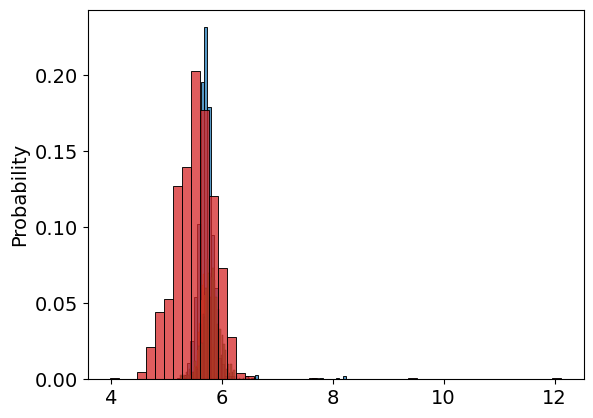

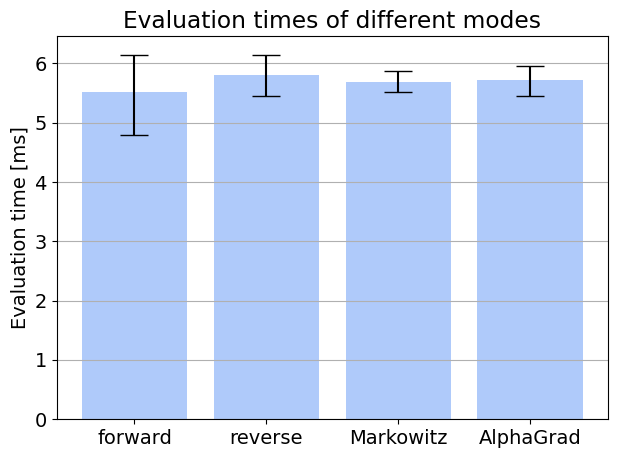

In [8]:
plot_performance(RobotArm_6DOF, xs, order, mM_order, "./RoeFlux.png", samplesize=1000)

### The best result yet
8.851480484008789, rev mean: 8.480618476867676, mM mean: 8.554961204528809, cc mean: 6.058162689208984
fwd err: [-0.17095661  0.20909023], rev err: [-0.20070934  0.3183279 ], mM err: [-0.3620758  0.3805647], cc err: [-0.351624   0.3441429]

fwd mean: 0.13376061618328094, rev mean: 0.12299295514822006, mM mean: 0.12740099430084229, cc mean: 0.1195559874176979
fwd err: [-0.0022094   0.00508478], rev err: [-0.00505075  0.00332312], mM err: [-0.00290978  0.00470254], cc err: [-0.00524038  0.00420592]

fwd mean: 11.58597469329834, rev mean: 11.101419448852539, mM_mean: 10.998786926269531, cc_mean: 10.468031883239746, 
fwd std: 0.5178468823432922, rev std: 1.0373451709747314, mM_std: 1.0301194190979004, cc_std: 0.8663851618766785

fwd mean: 11.926535606384277, rev mean: 11.291781425476074, mM_mean: 11.579188346862793, cc_mean: 10.853036880493164, 
fwd std: 0.5759796500205994, rev std: 0.9990830421447754, mM_std: 0.8783360719680786, cc_std: 1.3300716876983643

fwd mean: 11.498019218444824, rev mean: 10.715002059936523, mM_mean: 10.045455932617188, cc_mean: 9.468513488769531, 
fwd std: 0.43519699573516846, rev std: 0.7234329581260681, mM_std: 0.27425265312194824, cc_std: 0.502721905708313

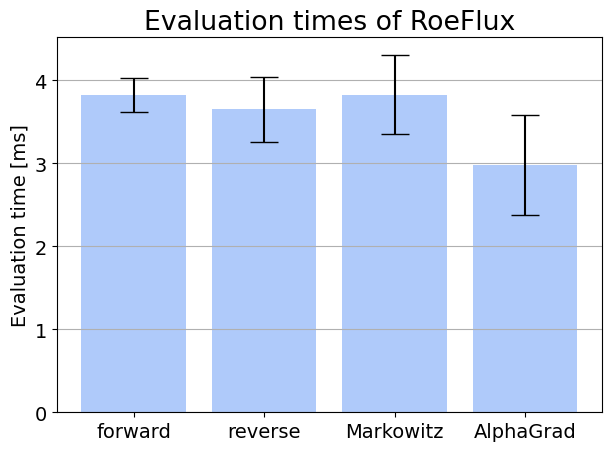

In [33]:
# Order: fwd, rev, mM, cc
means = jnp.array([3.8236873149871826, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])
x_pos = jnp.arange(len(means))
modes = ["forward", "reverse", "Markowitz", "AlphaGrad"]


fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, 
            ecolor="black", color="#6096f6", capsize=10)
    
ax.set_ylabel("Evaluation time [ms]", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(modes, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title(f"Evaluation times of RoeFlux")
ax.yaxis.grid(True)  
# ax.set_ylim((0.025, 0.04))

plt.tight_layout()